<table style="width:100%">
<tr>
<td style="vertical-align:middle; text-align:left;">
<font size="2">
Supplementary code for the <a href="http://mng.bz/orYv">Build a Large Language Model From Scratch</a> book by <a href="https://sebastianraschka.com">Sebastian Raschka</a><br>
<br>Code repository: <a href="https://github.com/rasbt/LLMs-from-scratch">https://github.com/rasbt/LLMs-from-scratch</a>
</font>
</td>
<td style="vertical-align:middle; text-align:left;">
<a href="http://mng.bz/orYv"><img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/cover-small.webp" width="100px"></a>
</td>
</tr>
</table>


# Appendix A: Introduction to PyTorch (Part 1)

## A.1 What is PyTorch

In [1]:
import torch

print(torch.__version__)

2.6.0+cpu


In [2]:
print(torch.cuda.is_available())

False


<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/1.webp" width="400px">

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/2.webp" width="300px">

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/3.webp" width="300px">

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/4.webp" width="500px">

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/5.webp" width="500px">

## A.2 Understanding tensors

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/6.webp" width="400px">

### A.2.1 Scalars, vectors, matrices, and tensors

In [10]:
import torch
import numpy as np

# create a 0D tensor (scalar) from a Python integer
tensor0d = torch.tensor(1)

# create a 1D tensor (vector) from a Python list
tensor1d = torch.tensor([1, 2, 3])

# create a 2D tensor from a nested Python list
tensor2d = torch.tensor([[1, 2], 
                         [3, 4]])

# create a 3D tensor from a nested Python list
tensor3d_1 = torch.tensor([[[1, 2], [3, 4]], 
                           [[5, 6], [7, 8]]])
print(tensor3d_1)

# create a 3D tensor from NumPy array
ary3d = np.array([[[1, 2], [3, 4]], 
                  [[5, 6], [7, 8]]])
tensor3d_2 = torch.tensor(ary3d)  # Copies NumPy array
tensor3d_3 = torch.from_numpy(ary3d)  # Shares memory with NumPy array

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [4]:
ary3d[0, 0, 0] = 999
print(tensor3d_2) # remains unchanged

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [5]:
print(tensor3d_3) # changes because of memory sharing

tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]])


### A.2.2 Tensor data types

In [6]:
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d.dtype)

torch.int64


In [7]:
floatvec = torch.tensor([1.0, 2.0, 3.0])
print(floatvec.dtype)

torch.float32


In [8]:
floatvec = tensor1d.to(torch.float32)
print(floatvec.dtype)

torch.float32


### A.2.3 Common PyTorch tensor operations

In [9]:
tensor2d = torch.tensor([[1, 2, 3], 
                         [4, 5, 6]])
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [10]:
tensor2d.shape

torch.Size([2, 3])

In [11]:
tensor2d.reshape(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [12]:
tensor2d.view(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [13]:
tensor2d.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [14]:
tensor2d.matmul(tensor2d.T)

tensor([[14, 32],
        [32, 77]])

In [15]:
tensor2d @ tensor2d.T

tensor([[14, 32],
        [32, 77]])

## A.3 Seeing models as computation graphs

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/7.webp" width="600px">

In [16]:
import torch.nn.functional as F

y = torch.tensor([1.0])  # true label
x1 = torch.tensor([1.1]) # input feature
w1 = torch.tensor([2.2]) # weight parameter
b = torch.tensor([0.0])  # bias unit

z = x1 * w1 + b          # net input
a = torch.sigmoid(z)     # activation & output

loss = F.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


## A.4 Automatic differentiation made easy

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/8.webp" width="600px">

In [17]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b 
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [18]:
loss.backward()

print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


## A.5 Implementing multilayer neural networks

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/9.webp" width="500px">

In [19]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(
                
            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [20]:
model = NeuralNetwork(50, 3)

In [21]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [22]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 2213


In [23]:
print(model.layers[0].weight)

Parameter containing:
tensor([[ 0.1182,  0.0606, -0.1292,  ..., -0.1126,  0.0735, -0.0597],
        [-0.0249,  0.0154, -0.0476,  ..., -0.1001, -0.1288,  0.1295],
        [ 0.0641,  0.0018, -0.0367,  ..., -0.0990, -0.0424, -0.0043],
        ...,
        [ 0.0618,  0.0867,  0.1361,  ..., -0.0254,  0.0399,  0.1006],
        [ 0.0842, -0.0512, -0.0960,  ..., -0.1091,  0.1242, -0.0428],
        [ 0.0518, -0.1390, -0.0923,  ..., -0.0954, -0.0668, -0.0037]],
       requires_grad=True)


In [24]:
torch.manual_seed(123)

model = NeuralNetwork(50, 3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [25]:
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [26]:
torch.manual_seed(123)

X = torch.rand((1, 50))
out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


In [27]:
with torch.no_grad():
    out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [28]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


## A.6 Setting up efficient data loaders

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/10.webp" width="600px">

In [29]:
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

In [30]:
X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

In [31]:
from torch.utils.data import Dataset


class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]        
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [32]:
len(train_ds)

5

In [33]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

In [34]:
test_ds = ToyDataset(X_test, y_test)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

In [35]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


In [36]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

In [37]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 2: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])


<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/11.webp" width="600px">

## A.7 A typical training loop

In [38]:
import torch.nn.functional as F


torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

num_epochs = 3

for epoch in range(num_epochs):
    
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)
        
        loss = F.cross_entropy(logits, labels) # Loss function
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # Optional model evaluation

Epoch: 001/003 | Batch 000/002 | Train/Val Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train/Val Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train/Val Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train/Val Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train/Val Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train/Val Loss: 0.00


In [39]:
model.eval()

with torch.no_grad():
    outputs = model(X_train)

print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


In [40]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])
tensor([0, 0, 0, 1, 1])


In [41]:
predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [42]:
predictions == y_train

tensor([True, True, True, True, True])

In [43]:
torch.sum(predictions == y_train)

tensor(5)

In [44]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0
    
    for idx, (features, labels) in enumerate(dataloader):
        
        with torch.no_grad():
            logits = model(features)
        
        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

In [45]:
compute_accuracy(model, train_loader)

1.0

In [46]:
compute_accuracy(model, test_loader)

1.0

## A.8 Saving and loading models

In [47]:
torch.save(model.state_dict(), "model.pth")

In [48]:
model = NeuralNetwork(2, 2) # needs to match the original model exactly
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

In [ ]:
import numpy as np

# Matrix using list of lists
matrix_list = [[1, 2, 3], [4, 5, 6]]
print("Matrix (list of lists):\n", matrix_list)

# Matrix using NumPy array
matrix_np = np.array([[1, 2, 3], [4, 5, 6]])
print("\nMatrix (NumPy array):\n", matrix_np)

tensor_np = np.array([[[267, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])
print("Tensor (NumPy array):\n", tensor_np)
print(tensor_np.

Matrix (list of lists):
 [[1, 2, 3], [4, 5, 6]]

Matrix (NumPy array):
 [[1 2 3]
 [4 5 6]]
Tensor (NumPy array):
 [[[267   2]
  [  3   4]]

 [[  5   6]
  [  7   8]]

 [[  9  10]
  [ 11  12]]]
b'\x0b\x01\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00'


<class 'numpy.ndarray'>
the dimension is torch.Size([5, 5, 3])
the dimension is torch.Size([5, 5, 3])


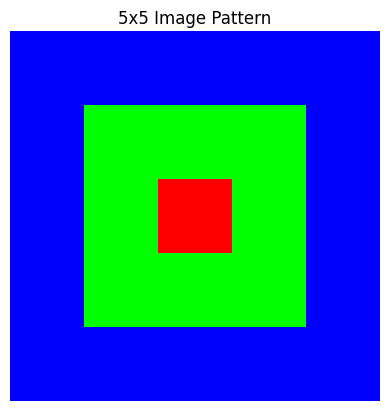

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Create a 5x5 matrix for the red channel
red_channel = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

# Create a 5x5 matrix for the green channel
green_channel = np.array([
    [0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 0, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 0, 0, 0, 0]
])

# Create a 5x5 matrix for the blue channel
blue_channel = np.array([
    [255, 255, 255, 255, 255],
    [255, 0, 0, 0, 255],
    [255, 0, 0, 0, 255],
    [255, 0, 0, 0, 255],
    [255, 255, 255, 255, 255]
])

# Stack the color channels to create a 5x5x3 tensor
image_tensor = np.stack([red_channel, green_channel, blue_channel], axis=-1)
print(type(image_tensor))
torch_sensor = torch.from_numpy(image_tensor)
print(f"the dimension is {torch_sensor.size()}")
print(f"the shape is {torch_sensor.shape}")
# Plot the image
plt.imshow(image_tensor)
plt.title('5x5 Image Pattern')
plt.axis('off')  # Hide axes
plt.show()

In [23]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ------------------ ------------------ 51.2/104.0 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.2/8.1 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/8.1 MB 10.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 19.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.4/8.1 MB 25.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.1/8.1 MB 28.1 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 27.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/219.8 kB ? eta -:--:--
   -------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import torch

# Create a sample tensor
x = torch.randn(2, 3, 4)

# Get the dimensions using .size()
size_x = x.size()
print(f"Dimensions using .size(): {size_x}")
# Expected output: Dimensions using .size(): torch.Size([2, 3, 4])

# Get the dimensions using .shape
shape_x = x.shape
print(f"Dimensions using .shape: {shape_x}")
# Expected output: Dimensions using .shape: torch.Size([2, 3, 4])

# Access individual dimensions
num_dimensions = len(size_x)
print(f"Number of dimensions: {num_dimensions}")
# Expected output: Number of dimensions: 3

dimension_1 = size_x[0]
dimension_2 = size_x[1]
dimension_3 = size_x[2]
print(f"Dimension 1: {dimension_1}, Dimension 2: {dimension_2}, Dimension 3: {dimension_3}")
# Expected output: Dimension 1: 2, Dimension 2: 3, Dimension 3: 4

Dimensions using .size(): torch.Size([2, 3, 4])
Dimensions using .shape: torch.Size([2, 3, 4])
Number of dimensions: 3
Dimension 1: 2, Dimension 2: 3, Dimension 3: 4


## A.9 Optimizing training performance with GPUs

### A.9.1 PyTorch computations on GPU devices

See [code-part2.ipynb](code-part2.ipynb)

### A.9.2 Single-GPU training

See [code-part2.ipynb](code-part2.ipynb)

### A.9.3 Training with multiple GPUs

See [DDP-script.py](DDP-script.py)